

### Objective:
Build intuition behind statistical inference

In [17]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [18]:
##### Setting the Population 
control = np.random.normal(loc=3,scale = 3, size = 1000000)
treatment = np.random.normal(loc=3.15,scale = 3, size = 1000000)

In [19]:
#Actual Lift in metric is 0%
observed_difference = treatment.mean() - control.mean()

In [20]:
print("Actual Lift in metric is:", observed_difference)

Actual Lift in metric is: 0.1416863468204923


In real world we do not have the entire population - we only have a sample of 1000 users in each cohort. 

Expected increase in metric is 5% i.e. metric = 3 will increase to 3.15

In [42]:
sample_size = 100000
sample_treatment = np.random.choice(treatment, size=sample_size, replace=True, p=None)
sample_control = np.random.choice(control, size=sample_size, replace=True, p=None)
sample_observed_difference = sample_treatment.mean() - sample_control.mean()
print("Lift in metric for our sample:", sample_observed_difference)

Lift in metric for our sample: 0.13193681695263137


In [43]:
def bootstrap_experiment(number_of_times,sample_size,A,B):
    mean_difference = np.empty([number_of_times,1])
    for times in np.arange(number_of_times):
        sample_1 = np.random.choice(A, size=sample_size, replace=True, p=None)
        sample_2 = np.random.choice(B, size=sample_size, replace=True, p=None)
        mean_difference[times] = np.mean(sample_2) - np.mean(sample_1)
    return mean_difference

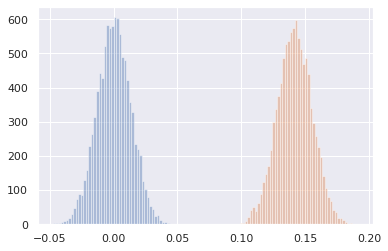

In [44]:
iterations = 10000
mean_difference_AB = bootstrap_experiment(iterations,sample_size,control,treatment)
mean_difference_AA = bootstrap_experiment(iterations,sample_size,control,control)

sns.distplot(mean_difference_AA, kde=False)
sns.distplot(mean_difference_AB, kde=False)

plt.show()

In [26]:
mean_difference_AA = np.sort(mean_difference_AA, axis=0)
mean_difference_AB = np.sort(mean_difference_AB, axis=0)

In [27]:
np.percentile(mean_difference_AB, [2.5,97.5])

array([0.04068854, 0.24753195])

In [28]:
np.percentile(mean_difference_AA, [2.5,97.5])

array([-0.10420761,  0.10724095])